<img src="images/continuum_analytics_logo.png" 
                                alt="Continuum Logo",
                                align="right",
                                width="30%">

Introduction to Bokeh
=====================

In this tutorial we'll learn how to use Bokeh to build interactive visualizations viewable in a browser.  Generally this tutorial will have the following format

1. `charting` - High level interface to go from data to plot
2. `plotting` - Intermediate interface allowing control to all parts of a plot
    - Vectorized attributes
    - Toolbars
    - Linked Brushing
    - Interactivity
3. Baseball example - Example of viewing statistics of baseball


Install
-------

This tutorial uses many different libraries that are all available with the [Anaconda Distribution](http://continuum.io/downloads). Once you have Anaconda install, please run these commands from a terminal:

```
$ conda install -y blaze
$ conda install -y bokeh
$ conda install -y odo
```


<hr/>


# Introduction to [Bokeh](http://bokeh.pydata.org/)

Provide a first-class visualization library for web-aware applications, without
requiring web-level programming.

##We wrote JavaScript, so you don't have to.

Write a visualization python. Bokeh creates data descripors and a scenegraph consumed by BokehJS.
This works in ipython notebook, creating static files and interacting with dynamic data sources.

Bokeh includes pre-built schemas in bokeh.charts, a low-level composition interface (similar to matplotlib),
a server for large and/or dynamic datasources and widgets for providing client-side realtime interaction.

The non-JS framework also has prototypes in other languages (Scala, Julia...maybe R).

**Note:** There are examples notebooks in bokeh/examples/plotting/notebooks. Start an ipython notebook server there to get more examples.

[Gallery](http://bokeh.pydata.org/docs/gallery.html) --
[tutorial](http://bokeh.pydata.org/tutorial/index.html) -- 
[Documentation](http://bokeh.pydata.org/docs/user_guide.html) --
[Repo](https://github.com/bokeh/bokeh)


In [1]:
import pandas as pd
import numpy as np

## Output

Bokeh can output to html, a notebook, or just fragments for embedding in a web application. 

To start playing, we'll use the notebook. Later we will see the other types of output.


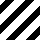
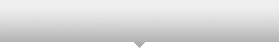
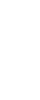
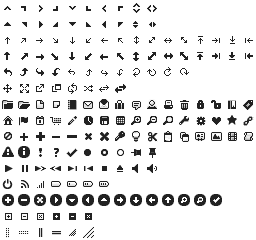
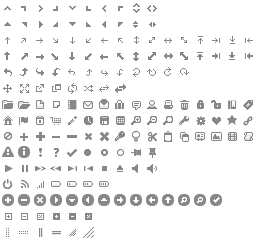
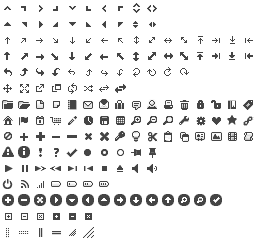
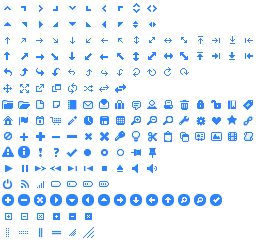
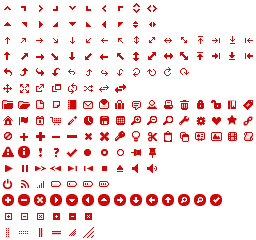
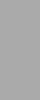
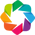
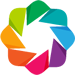
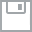
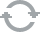
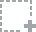
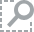
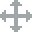
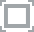
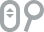

In [2]:
from bokeh.plotting import output_notebook  
output_notebook() # Tell Bokeh to output in an ipython notebook (other options later)

<hr/>

## Plotting.py

This is a mid-level interface, used by the charting library (and other parts of bokeh).   It can also be used directly.
The basic idea: there is an active plot, and you are modifying it.


In [3]:
import numpy as np
from bokeh.plotting import *
N = 102
lin_arr = np.linspace(0, 4*np.pi, N)
sin_arr = np.sin(lin_arr)
cos_arr = np.cos(lin_arr)

<hr />

## Scatter Plots

To begin with let's make a scatter plot.

In [4]:

p1 = figure()
p1.scatter(lin_arr, sin_arr, color="#FF00FF")
p1.scatter(lin_arr, cos_arr, color="green")
show(p1)

<hr />

## Exercise

Play with plotting arrays, try editting
- color,
- markers,
- alpha (value between 0-1), and 
- size (int of pixels)

In [5]:
p2 = figure()
p2.scatter(x=lin_arr, y=sin_arr, color="red")
show(p2)

In [6]:
p3 = figure()
p3.scatter(x=lin_arr, y=cos_arr , marker="square", color="green")
show(p3)

### Other plotting things...
There are lots of [glyph types](http://bokeh.pydata.org/docs/reference/plotting.html) and lots of [properties](http://bokeh.pydata.org/docs/user_guide/objects.html#userguide-objects-line-properties)...here is just a sample

<hr />
## Everything is vectorized

While we have only been passing vectors for locations, we can do so for almost any parameter.

Let's use the `cos_arr` to size the circles

In [7]:
p4 = figure()
p4.scatter(x=lin_arr, y=sin_arr, size=cos_arr**2*10)
show(p4)

<hr/>

Let's play with colors now. Brewer is a popular set of palletes. Here we pick one and then build a vector of colors for the plot.

In [8]:
from bokeh.palettes import brewer
print "Brewer Palettes:", brewer.keys()
print "Brewer Grey Palettes:", brewer["Greys"].keys()
palette = brewer["Greys"][9] + list(reversed(brewer["Greys"][9]))
colors = palette * (len(lin_arr) / len(palette)) + palette[0:len(lin_arr) % len(palette)]

Brewer Palettes: ['Spectral', 'RdYlGn', 'OrRd', 'PuBu', 'BuPu', 'RdBu', 'Oranges', 'BuGn', 'PiYG', 'YlOrBr', 'YlGn', 'RdPu', 'Greens', 'PRGn', 'YlGnBu', 'RdYlBu', 'BrBG', 'Purples', 'Reds', 'GnBu', 'Greys', 'RdGy', 'YlOrRd', 'PuOr', 'PuRd', 'Blues', 'PuBuGn']
Brewer Grey Palettes: [3, 4, 5, 6, 7, 8, 9]


In [9]:
p5 = figure()
p5.scatter(x=lin_arr, y=sin_arr, size=cos_arr**2*10 + 5, fill_color=colors)
show(p5)

<hr/>

## Tools

If you notice the bar at the top of the you see several places to interact with the plot.

These are tools and there a many different tools built into the Bokeh.

Let's take a look at HoverTools, but first we use Bokeh's data source which watches changes.

In [10]:
source = ColumnDataSource(
    data=dict(
        x=lin_arr,
        y=sin_arr,
        size=cos_arr**2*10 + 5,
        colors=colors
    )
)

In [11]:
from bokeh.models import HoverTool
from collections import OrderedDict

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave"
p6 = figure(title="Hoverful Scatter", tools=TOOLS)
p6.circle(x="x", y="y", size="size", source=source,
    fill_color="colors", fill_alpha=0.6, line_color=None)

hover = p6.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ("size", "@size"),
    ("fill color", "$color[hex, swatch]:fill_color"),
])
show(p6)

<hr />

## Linking two plots

One of the best aspects of Bokeh is linking plots. We can link the brushing. This will allow you to select and pan with the plots both reacting to each other.

In [12]:

N = 300
x = np.linspace(0, 4*np.pi, N)
y1 = np.sin(x)
y2 = np.cos(x)

source = ColumnDataSource()
source.add(data=x, name='x')
source.add(data=y1, name='y1')
source.add(data=y2, name='y2')

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"

s1 = figure(tools=TOOLS, plot_width=350, plot_height=350)
s1.scatter('x', 'y1', source=source)

# Linked brushing in Bokeh is expressed by sharing data sources between
# renderers. Note below that s2.scatter is called with the `source`
# keyword argument, and supplied with the same data source from s1.scatter
s2 = figure(tools=TOOLS, plot_width=350, plot_height=350, x_range=s1.x_range)
s2.scatter('x', 'y2', source=source, )

p = gridplot([[s1,s2]])
show(p)

<hr />

## Basic interactivity

Bokeh lets you use a Python update function to update your plots.

In IPython notebook we can use the interactive widgets provided by the notebook. One can also use Flask or Bokeh-server to embed in outside the notebook.

In [13]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600)
p.line(x, y, color="#2222aa", line_width=3, source=source, name="foo")

In [14]:
from IPython.html.widgets import interact
@interact(f=["sin", "cos", "tan"], w=(0,100), A=(1,10), phi=(0, 10, 0.1))
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source.data['y'] = A * func(w * x + phi)
    source.push_notebook()


In [15]:
show(p)

<hr/>

## [bokeh.charts](http://bokeh.pydata.org/docs/user_guide/charts.html)
Common Schemas for common tasks (and parameters).

Expects data to be formatted as either an OrderedDict or a pandas dataframe.

Supported Schemas: Bar, Boxplot, Categorical Heatmap, Histogram, Scatter, Timeseries

In [16]:
from collections import OrderedDict
from bokeh.charts import Histogram

mu, sigma = 0, 0.5
normal_dist = OrderedDict(normal=np.random.normal(mu, sigma, size=1000))
hist = Histogram(normal_dist, bins=50,
                 title="kwargs, dict_input", 
                 ylabel="frequency", 
                 legend="top_left",
                 width=400, 
                 height=350, 
                 notebook=True)
hist.show()

<hr />

# Baseball App Example

In this example we use Blaze and Bokeh to explore the Lahman Baseball Statistics database.




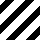
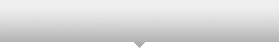
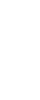
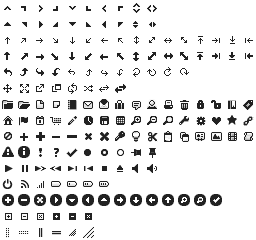
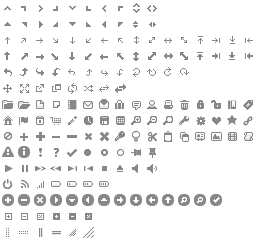
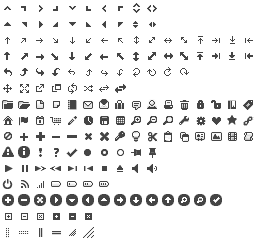
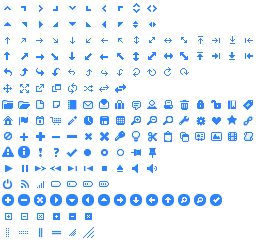
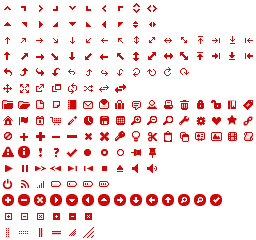
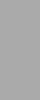
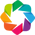
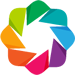
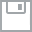
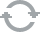
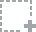
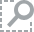
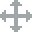
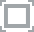
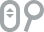

In [17]:
import blaze as bz
import pandas as pd
import numpy as np
from odo import odo
from bokeh.plotting import *
output_notebook()

In [18]:
db = bz.Data('sqlite:///lahman2013.sqlite')
db.dshape

dshape("""{
  AllstarFull: var * {
    playerID: ?string,
    yearID: ?int32,
    gameNum: ?int32,
    gameID: ?string,
    teamID: ?string,
    lgID: ?string,
    GP: ?int32,
    startingPos: ?int32
    },
  Appearances: var * {
    yearID: ?int32,
    teamID: ?string,
    lgID: ?string,
    playerID: ?string,
    G_all: ?int32,
    GS: ?int32,
    G_batting: ?int32,
    G_defense: ?int32,
    G_p: ?int32,
    G_c: ?int32,
    G_1b: ?int32,
    G_2b: ?int32,
    G_3b: ?int32,
    G_ss: ?int32,
    G_lf: ?int32,
    G_cf: ?int32,
    G_rf: ?int32,
    G_of: ?int32,
    G_dh: ?int32,
    G_ph: ?int32,
    G_pr: ?int32
    },
  AwardsManagers: var * {
    playerID: ?string,
    awardID: ?string,
    yearID: ?int32,
    lgID: ?string,
    tie: ?string,
    notes: ?string
    },
  AwardsPlayers: var * {
    playerID: ?string,
    awardID: ?string,
    yearID: ?int32,
    lgID: ?string,
    tie: ?string,
    notes: ?string
    },
  AwardsShareManagers: var * {
    awardID: ?string,
    year

In [19]:
list(db.Salaries.teamID.distinct())

[u'ATL',
 u'BAL',
 u'BOS',
 u'CAL',
 u'CHA',
 u'CHN',
 u'CIN',
 u'CLE',
 u'DET',
 u'HOU',
 u'KCA',
 u'LAN',
 u'MIN',
 u'ML4',
 u'MON',
 u'NYA',
 u'NYN',
 u'OAK',
 u'PHI',
 u'PIT',
 u'SDN',
 u'SEA',
 u'SFN',
 u'SLN',
 u'TEX',
 u'TOR',
 u'COL',
 u'FLO',
 u'ANA',
 u'ARI',
 u'MIL',
 u'TBA',
 u'LAA',
 u'WAS',
 u'MIA']

In [20]:
r = bz.compute(db.Salaries["teamID"].distinct())
odo(r, pd.DataFrame)

0
0   ATL
1   BAL
2   BOS
3   CAL
4   CHA
5   CHN
6   CIN
7   CLE
8   DET
9   HOU
10  KCA
11  LAN
12  MIN
13  ML4
14  MON
15  NYA
16  NYN
17  OAK
18  PHI
19  PIT
20  SDN
21  SEA
22  SFN
23  SLN
24  TEX
25  TOR
26  COL
27  FLO
28  ANA
29  ARI
30  MIL
31  TBA
32  LAA
33  WAS
34  MIA

In [21]:
result = bz.by(db.Salaries.teamID, avg=db.Salaries.salary.mean(), 
                                   max=db.Salaries.salary.max(), 
                                   ratio=db.Salaries.salary.max() / db.Salaries.salary.min()
                ).sort('ratio', ascending=False)
df = odo(result, pd.DataFrame)

In [22]:
df.head()

teamID             avg       max       ratio
0    PHI  2092230.932636  25000000  416.666667
1    LAN  2346982.698026  23854494  397.574900
2    NYN  2317349.977246  23145011  385.750183
3    DET  1980834.990208  23000000  383.333333
4    MIN  1525031.650386  23000000  383.333333

In [23]:
df = df.sort('avg')
source = ColumnDataSource(df)
p = figure(x_range=list(df["teamID"]))
p.scatter(x="teamID", y="avg", source=source)
show(p)

Hmm, can't read the y axis very well...

In [24]:
df = df.sort('avg')
source = ColumnDataSource(df)
p = figure(x_range=list(df["teamID"]))
p.scatter(x="teamID", y="avg", source=source)
p.xaxis.major_label_orientation = np.pi/3

show(p)

Let's view a max versus ratio

In [25]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,lasso_select"

df = df.sort('avg')
source = ColumnDataSource(df)
s1 = figure(title="Pay Avg",x_range=source.data["teamID"], tools=TOOLS, width=500)
s1.scatter(x="teamID", y="avg", source=source)
s1.xaxis.major_label_orientation = np.pi/3

s2 = figure(title="Pay Ratio", x_range=s1.x_range, tools=TOOLS, width=500)
s2.scatter(x="teamID", y="ratio", source=source)
s2.xaxis.major_label_orientation = np.pi/3

p = gridplot([[s1, s2]])
show(p)

<hr/>

Now let's join on the AllStars table to see how max salaries and all star count correlate.

In [26]:
result = bz.by(db.AllstarFull.teamID, all_stars=db.AllstarFull.playerID.count()
                ).sort('all_stars', ascending=False)
r = bz.Data(odo(result, pd.DataFrame))
m = odo(r, pd.DataFrame)["all_stars"].max()
print "max number of all stars from a single team:", m

print "normalized list of all_stars:\n", bz.compute((r.all_stars / m).head())

# Now let's use this as the size of the circles in the scatter plot
df1 = odo(r, pd.DataFrame)
df1['all_stars'] /= (df1['all_stars'].max() / 10)
df1['all_stars'] += 10

max number of all stars from a single team: 412
normalized list of all_stars:
0    1.000000
1    0.737864
2    0.691748
3    0.623786
4    0.570388
5    0.565534
6    0.512136
7    0.492718
8    0.458738
9    0.453883
Name: all_stars, dtype: float64


<hr/>

Now lets join the data to all_star sizes

In [27]:
r = bz.join(bz.Data(df1), bz.Data(df), 'teamID')
r.head()

teamID  all_stars             avg       max       ratio
0    NYA  20.048780  3608860.148538  33000000         NaN
1    SLN  17.414634  1928832.554779  16333327  272.222117
2    BOS  16.951220  2692113.856808  22500000  375.000000
3    CIN  16.268293  1568035.281324  18910655  315.177583
4    CLE  15.731707  1525794.958478  15000000  250.000000
5    DET  15.682927  1980834.990208  23000000  383.333333
6    CHN  15.146341  2185518.654080  19000000  316.666667
7    CHA  14.951220  1992653.501232  17000000  340.000000
8    PIT  14.609756  1077989.680376  16500000         NaN
9    PHI  14.560976  2092230.932636  25000000  416.666667

In [28]:
df_j = odo(r, pd.DataFrame)
df_j = df_j.sort("max")
print df_j.head()
source = odo(df_j, ColumnDataSource)
p = figure(x_range=list(df_j["teamID"]))
p.scatter(x="teamID", y="max", size="all_stars", source=source, fill_alpha=0.5, )
p.xaxis.major_label_orientation = np.pi/3

show(p)

   teamID  all_stars             avg       max       ratio
24    CAL  11.634146   739073.179348   5375000   89.583333
25    ML4  11.170732   613243.580052   5875000   97.916667
31    TBA  10.707317  1528399.505495  10125000   59.558824
23    MON  11.707317   707458.857886  11500000  191.666667
19    KCA  12.024390  1299025.786808  13000000  216.666667


<hr/>

Now let's make this an interactive plot!

In [29]:
def compute_df(year=2012):
    result = db.Salaries[ db.Salaries.yearID==year ]
    result = bz.Data(odo(result, pd.DataFrame))
    result = bz.by(result.teamID, max=result.salary.max()).sort('max', ascending=False)
    df = odo(result, pd.DataFrame)
    asf_year = db.AllstarFull[ db.AllstarFull.yearID==year]
    result = bz.by(asf_year.teamID, all_stars=db.AllstarFull.playerID.count()
                    ).sort('all_stars', ascending=False)
    r = bz.Data(odo(result, pd.DataFrame))
    df1 = odo(r, pd.DataFrame)
    df1['all_stars'] /= (df1['all_stars'].max() / 10)
    df1['all_stars'] += 10
    r = bz.join(bz.Data(df1), bz.Data(df), 'teamID')
    df_j = odo(r, pd.DataFrame)
    df_j = df_j.sort("max")
    return df_j

source = odo(compute_df(), ColumnDataSource)

p = figure(x_range=list(source.data["teamID"]))
p.scatter(x="teamID", y="max", size="all_stars", source=source, fill_alpha=0.5, )
p.xaxis.major_label_orientation = np.pi/3

In [30]:
from IPython.html.widgets import interact, IntSliderWidget

def update(year):
    df = compute_df(year)
    source.data['all_stars'] = df['all_stars']
    source.data['max'] = df['max']
    source.push_notebook()
#interact(update, year=(1980, 2013))
interact(update, year=IntSliderWidget(min=1985, max=2013, value=2013))

<function __main__.update>

In [31]:
show(p)